<a href="https://colab.research.google.com/github/subhashsomarouthu/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/subhashsomarouthu/Credit_Card_Default_Prediction

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

Business Objective:The goal is to predict the likelihood of customers defaulting on their credit card payments in Taiwan. This prediction is essential for risk management purposes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt#For visualizations
import itertools
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature datas
from sklearn.impute import KNNImputer, SimpleImputer#for handling missing data

# Importing libraries for modelling and evaluation
from pandas.plotting import parallel_coordinates

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from imblearn.over_sampling import SMOTE#for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=473ed9ac7695b7c36072dd90d9447f60f46c7a5eabf753e9f13d6121d8229b65
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#for model explainability
import lime
import lime.lime_tabular

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone_project/capstone3_classification/default of credit card clients.csv',header=1)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])


0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

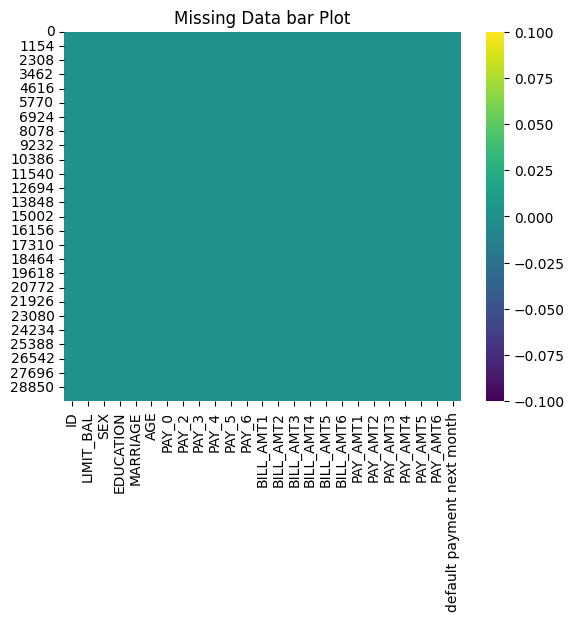

In [ ]:
# Visualizing the missing values
import missingno as msno


sns.heatmap(df.isna(),cmap="viridis")

plt.title('Missing Data bar Plot')
plt.show()

### What did you know about your dataset?

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. It consists of 30,000 rows and 25 columns. I observed that there are no duplicate values and misssing values/null values in the dataset. There are 24 Independent features and Default payment next month is the target variable. All independent features are of Int data type. There are categorical variables like Sex, Education and MArriage. Remaining all independent variables are Numerical.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df['SEX'].unique()

array([2, 1])

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print('unique values in ',i, 'are', df[i].nunique())



unique values in  ID are 30000
unique values in  LIMIT_BAL are 81
unique values in  SEX are 2
unique values in  EDUCATION are 7
unique values in  MARRIAGE are 4
unique values in  AGE are 56
unique values in  PAY_0 are 11
unique values in  PAY_2 are 11
unique values in  PAY_3 are 11
unique values in  PAY_4 are 11
unique values in  PAY_5 are 10
unique values in  PAY_6 are 10
unique values in  BILL_AMT1 are 22723
unique values in  BILL_AMT2 are 22346
unique values in  BILL_AMT3 are 22026
unique values in  BILL_AMT4 are 21548
unique values in  BILL_AMT5 are 21010
unique values in  BILL_AMT6 are 20604
unique values in  PAY_AMT1 are 7943
unique values in  PAY_AMT2 are 7899
unique values in  PAY_AMT3 are 7518
unique values in  PAY_AMT4 are 6937
unique values in  PAY_AMT5 are 6897
unique values in  PAY_AMT6 are 6939
unique values in  default payment next month are 2


In [ ]:
categorical=['SEX','EDUCATION','MARRIAGE']

In [ ]:
for i in categorical:
  print('unique values in ',i, 'are', df[i].unique())


unique values in  SEX are [2 1]
unique values in  EDUCATION are [2 1 3 5 4 6 0]
unique values in  MARRIAGE are [1 2 3 0]


### Variables Description

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit

SEX: Gender
1=male,
2=female

EDUCATION:
1=graduate school,
2=university,
3=high school,
0, 4, 5, 6=others)

MARRIAGE: Marital status
1=married,
2=single,
3=divorce,
0=others

AGE: Age in years

History of Past Payments

PAY_0: Repayment status in September, 2005

-2: No consumption
-1: Paid in full
0: The use of revolving credit
1 = payment delay for one month
2 = payment delay for two months
8 = payment delay for eight months
9 = payment delay for nine months and above.

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

Amount of bill Statement

BILL_AMT1: Amount of bill statement in September, 2005

BILL_AMT2: Amount of bill statement in August, 2005

BILL_AMT3: Amount of bill statement in July, 2005

BILL_AMT4: Amount of bill statement in June, 2005

BILL_AMT5: Amount of bill statement in May, 2005

BILL_AMT6: Amount of bill statement in April, 2005

Amount of Previous Payments -Previous amount Paid

PAY_AMT1: Amount of previous payment in September, 2005

PAY_AMT2: Amount of previous payment in August, 2005

PAY_AMT3: Amount of previous payment in July, 2005

PAY_AMT4: Amount of previous payment in June, 2005

PAY_AMT5: Amount of previous payment in May, 2005

PAY_AMT6: Amount of previous payment in April, 2005

default payment next month: Default payment

1=yes,
0=no

## 3. ***Data Wrangling***

### Data Wrangling Code

In [51]:
# Write your code to make your dataset analysis ready.
#let me save my original dataset by making a copy

df_copy=df.copy()

df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
#renaming of columns for better understanding in visualization
df_copy.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df_copy.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df_copy.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df_copy.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [53]:
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [54]:
# Replace values in SEX, MARRIAGE and EDUCATION variables, refering the dataset description for better visualization and understanding.
df_copy['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})
df_copy['EDUCATION'] = df['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_copy['MARRIAGE'] = df['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [56]:
df_copy.shape

(30000, 25)

### What all manipulations have you done and insights you found?

I made a copy for my original dataset and change my column names to the names that are easy to intrepret. I also changed the values of columns sex, marriage and education(all categorical values) to their original form as per the variable description for better understanding in visualization.

Now my dataset is ready for visualization

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [57]:
df_copy.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


#### Chart - 1

#Univariate Analyses

<Axes: xlabel='IsDefaulter', ylabel='count'>

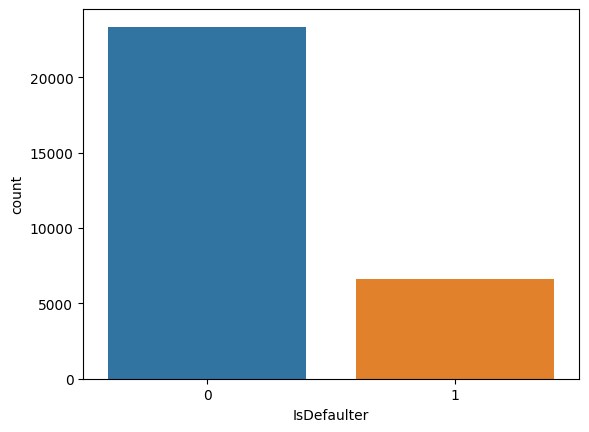

In [58]:
# Chart - 1 visualization code
#Visualizing dependent variable isDefaulter to see for any imbalances in data.

sns.countplot(x='IsDefaulter',data=df_copy)



##### 1. Why did you pick the specific chart?

A count plot is a type of data visualization that displays the number of occurrences of each category in a categorical variable. It is a simple bar chart that shows the count or frequency of each unique value in a dataset.



##### 2. What is/are the insight(s) found from the chart?

It seems that the dataset is imbalanced.It is expected because defaulters will be in less quantity in real world, however we need to handle this using techniques like SMOTE before training the model for better accuracy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by handling imbalanced dataset we can develop much more good model which will effectively predict defaulters.

#### Chart - 2

#Analyzing each Categorical variable separately.

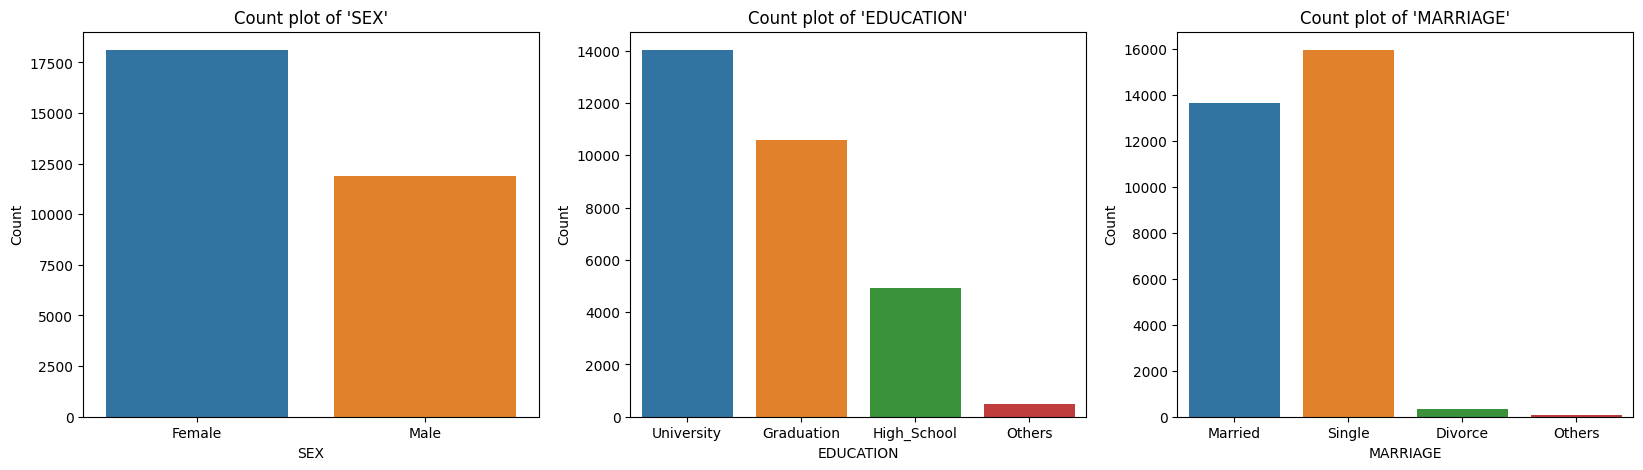

In [59]:
# Chart - 2 visualization code
fig, axs = plt.subplots(1, len(categorical), figsize=(20, 5))

# Loop through each categorical variable
for i, cat_var in enumerate(categorical):
    # Visualization: Count plot of the categorical variable
    sns.countplot(data=df_copy, x=cat_var, ax=axs[i])
    axs[i].set_title(f"Count plot of '{cat_var}'")
    axs[i].set_xlabel(cat_var)
    axs[i].set_ylabel('Count')

##### 1. Why did you pick the specific chart?

The count plot is suitable for visualizing the distribution of a categorical variable with relatively few unique values, like 'SEX',;EDUCATION' AND 'MARRIAGE' where we want to see the count of each category (male and female) in the SEX, University, graduation, highschool or others in Education and married, single or divorced in marriage.

##### 2. What is/are the insight(s) found from the chart?

1. Females are utilizing credict card facility more than males
2. Education level as university and graduation are more than other types.
3. Divorced people and others are less likely to utilize or using credit cards

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative impact to business objective here,it is just a frequency plot. However we can find each variable relationship with IsDefaulter to draw meaningful insights.

#### Chart - 3

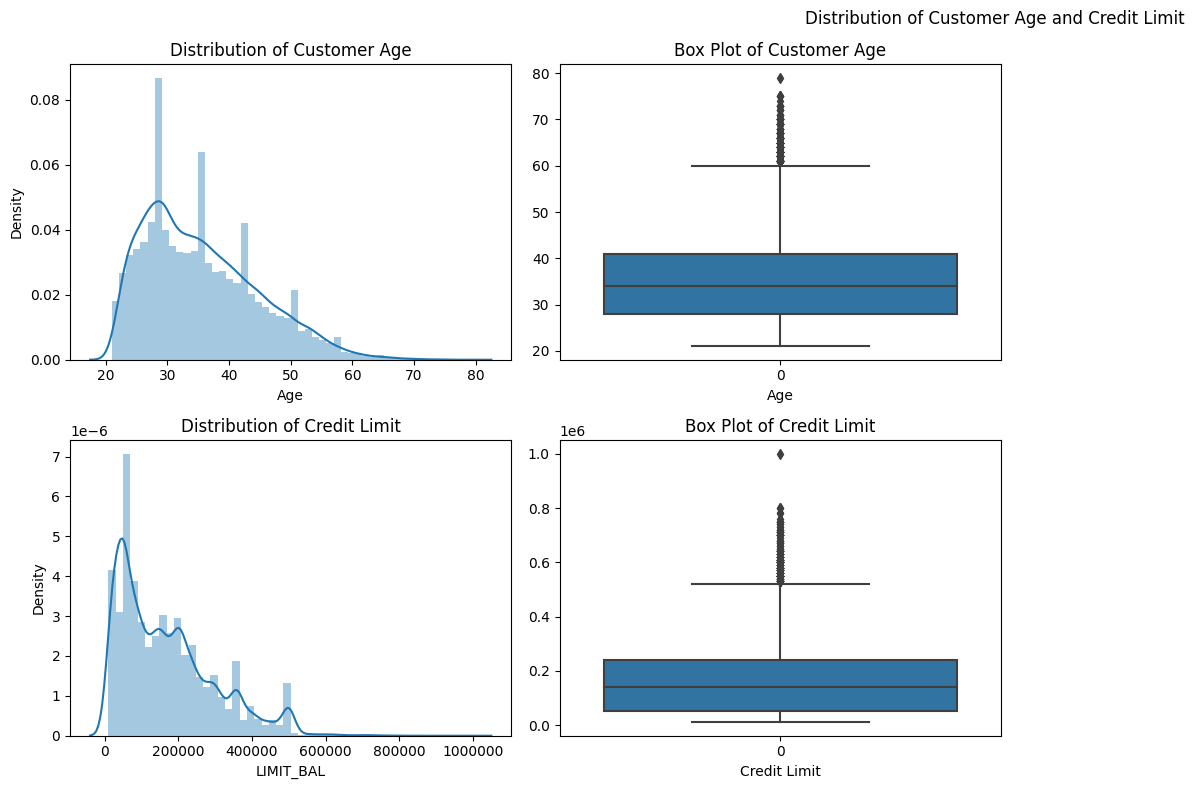

In [69]:
# Chart - 3 visualization code
# Distribution of age of customers and Credit Limit
plt.figure(figsize=(20, 8))
plt.suptitle('Distribution of Customer Age and Credit Limit')

# Subplot 1: Distribution plot of 'AGE'
plt.subplot(2, 4, 1)
sns.distplot(df_copy['AGE'])
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Subplot 2: Box plot of 'AGE'
plt.subplot(2, 4, 2)
sns.boxplot(df_copy['AGE'])
plt.title('Box Plot of Customer Age')
plt.xlabel('Age')

# Subplot 3: Distribution plot of 'LIMIT_BAL'
plt.subplot(2, 4, 5)
sns.distplot(df_copy['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Credit Limit')

#plt.xlabel('Credit Limit')
#plt.ylabel('Density')

# Subplot 4: Box plot of 'LIMIT_BAL'
plt.subplot(2, 4, 6)
sns.boxplot(df_copy['LIMIT_BAL'])
plt.title('Box Plot of Credit Limit')
plt.xlabel('Credit Limit')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The distribution plot is used to visualize the distribution of 'AGE' and 'LIMIT_BAL', while the box plot helps to identify the central tendency and spread of the data for these two variables

##### 2. What is/are the insight(s) found from the chart?

For 'AGE': The distribution plot shows the age distribution of customers, indicating the most common age range and any potential skewness in the data. The box plot provides information about the median, quartiles, and potential outliers, which may be useful for identifying age-related patterns in credit defaulters.

For 'LIMIT_BAL': The distribution plot displays the distribution of credit limits among customers, giving insights into the common credit limit ranges. The box plot helps identify any potential outliers and the spread of credit limits, which can help in identifying customers with higher or lower credit limits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these visualizations can be valuable for the business's objective of predicting credit defaulters. Understanding the distribution and characteristics of age and credit limits among customers can aid in building more accurate models for predicting credit defaults and customizing risk management strategies.

#### Chart - 4

#Bivariate Analyses/ Multivariate Analyses

#Analysing relationship between each categorical feature with respect to target variable.

In [71]:
categorical


['SEX', 'EDUCATION', 'MARRIAGE']

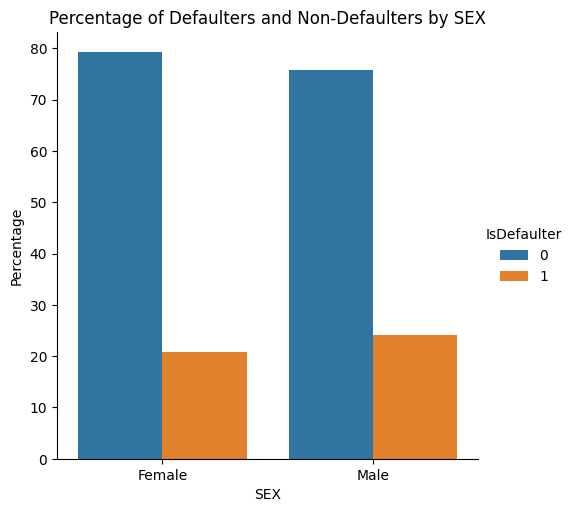

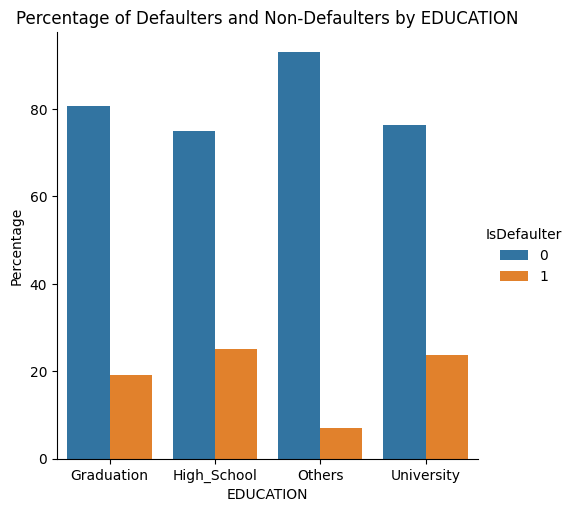

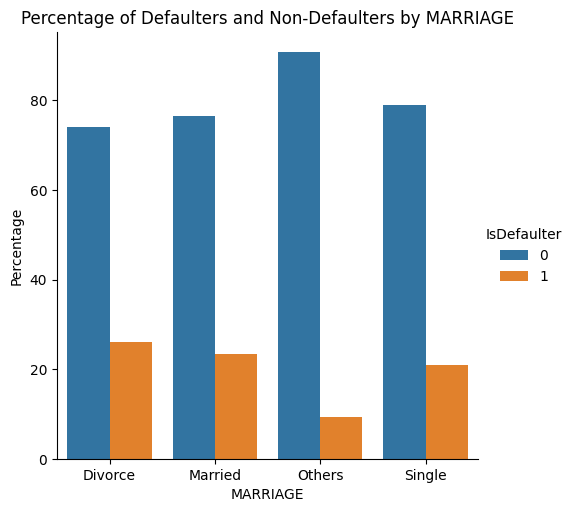

In [81]:
# Chart - 4 visualization code

# Loop through each categorical variable and create side-by-side bar plots
for cat_var in categorical:
    # Calculate the percentage of defaulters and non-defaulters for each category in the variable
    cat_default_percent = df_copy.groupby(cat_var)['IsDefaulter'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

    # Plot the side-by-side bar plot for the current categorical variable
    sns.catplot(data=cat_default_percent, x=cat_var, y='Percent', hue='IsDefaulter', kind='bar')
    plt.title(f"Percentage of Defaulters and Non-Defaulters by {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel('Percentage')
    plt.show()


##### 1. Why did you pick the specific chart?

The catplot function is used in the visualization code above because it is specifically designed for creating categorical plots. It is a high-level function that can create a variety of categorical plots with just a single line of code.

In the given code, sns.catplot is used to create bar plots for each of the three categorical variables ('SEX', 'EDUCATION', and 'MARRIAGE').

##### 2. What is/are the insight(s) found from the chart?

In the 'SEX' bar plot,  It can be observed that even though the count of female customers are high, male customers are the ones who are defaulted more.

In the 'EDUCATION' bar plot, the majority proportion of defaulters are the high school and university students.

Similarly, in the 'MARRIAGE' bar plot, divorced and married people are more defaulters. It is also reasonable because married people and divorced people spend more rather than singles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above visualizations can have a positive business impact. For example, if there are noticeable differences in default rates based on gender, education, or marital status, the business can tailor its credit risk assessment and marketing strategies accordingly. This can help in better targeting potential defaulters, reducing overall credit risk.


#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***